[['+---------+']
 ['|R: | : :G|']
 ['| : | : : |']
 ['| : : : : |']
 ['| | : | : |']
 ['|Y| : |B: |']
 ['+---------+']]
Episode 40000/40000 || Best average reward 2.11292582257056473667

Episode 40000/40000 || Best average reward -9.9223750712017865

Episode 40000/40000 || Best average reward -15.139675506337665

Episode 40000/40000 || Best average reward 5.034575859396485565573



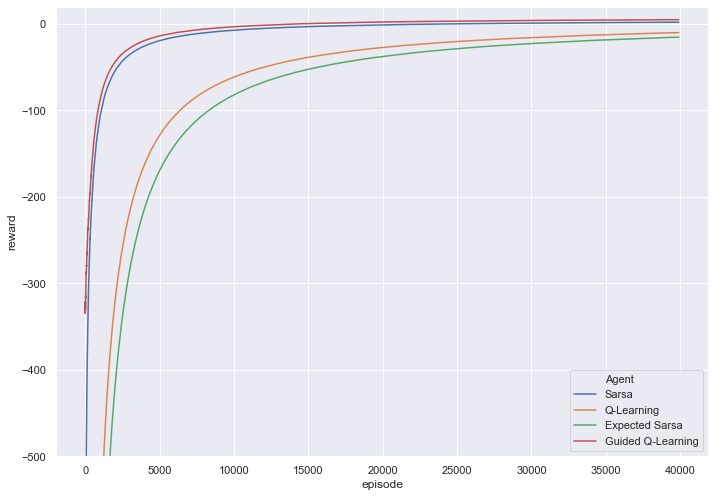

In [5]:
%reload_ext autoreload
%autoreload 2

from agent import Agent, Sarsa, QLearning, ExpectedSarsa, QLearningGuided
from monitor import interact
import gym
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Taxi-v3').env  # If you use gym.make('Taxi-v3'), then a limit of 200 steps is applied

game_map = np.array(["".join((c.decode("utf-8") for c in line[0:])) for line in env.desc.tolist()]).reshape((-1, 1))
print(game_map)

sns.set(rc={'figure.figsize': (11.7, 8.27)})

agent_names = ["Sarsa", "Q-Learning", "Expected Sarsa", "Guided Q-Learning"]
agent_classes = [Sarsa, QLearning, ExpectedSarsa, QLearningGuided]

data = pd.DataFrame([], columns=['Agent', 'episode', 'reward'])

for i in range(4):
    agent = agent_classes[i](env)
    agent_name = agent_names[i]

    avg_rewards, best_avg_reward = interact(env, agent)

    data_new = pd.DataFrame(list(avg_rewards), columns=['reward'])
    data_new.loc[:, 'episode'] = range(0, len(list(avg_rewards)))
    data_new.loc[:, 'Agent'] = agent_name
    data = data.append(data_new)

ax = sns.lineplot(x='episode', y='reward', hue='Agent', data=data)
ax.set(ylim=(-500, 20))
ax.figure.savefig("tax1v3.png")

# plt.show()